In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data/Cropped-Faces-DataFrame-from-4.7.0.csv', index_col='index')
path_to_cropped_faces = 'data/input/Cropped Arrays'

We Have our final cropped faces and their numpy arrays from index.4.7.0:
Let us start to do some prediction!

You Should Unzip the arrays ! if you are not yet.

In [4]:
#!unzip -q 'data/Cropped Arrays.4.7.0.zip' -d 'data/input/'

تابع برای خواندن آرایه هایی که قبلا از صورت گرفته و ذخیره کرده بودیم

In [5]:
def load_array_from_path(path):
    return np.load(path)

Loaded array for face_0.jpg from data/output/csv/Cropped Arrays/face_0.jpg_0.npy

  -->> Emotion Label -->>  0 


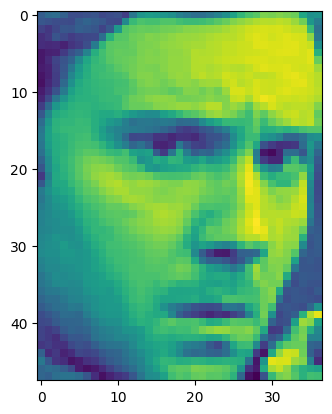

Loaded array for face_4.jpg from data/output/csv/Cropped Arrays/face_4.jpg_4.npy

  -->> Emotion Label -->>  6 


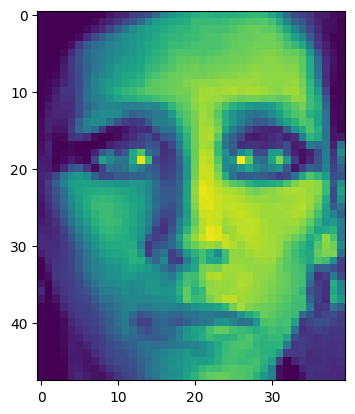

Loaded array for face_5.jpg from data/output/csv/Cropped Arrays/face_5.jpg_5.npy

  -->> Emotion Label -->>  2 


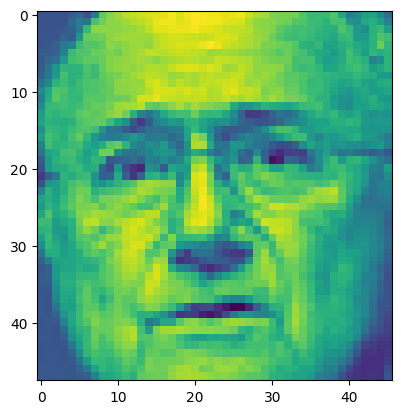

In [4]:
i = 0
lim = 3

for idx, row in df.iterrows():
    i += 1
    array_path = row['pixel']
    array = load_array_from_path(f"{path_to_cropped_faces}/face_{idx}.jpg_{idx}.npy")
    print(f"Loaded array for {row['name']} from {array_path}" )
    print('\n', f" -->> Emotion Label -->>  {row['emotion']} ")
    plt.imshow(array)
    plt.show()
    if i == lim:
      break

We Need our other model to detect the facial part to use for our delaunay jobs!! :)

یا به قول داییم : فارسی شِکَر ! یه مدل دیگه فراخونی میکنیم

 برای پیدا کردن قسمت های مختلف صورت که بدیم به کلاس ها و توابع اسی پای دلونی!

#### predictor path :
#### frontal face detection object :

In [ ]:
%pip install --upgrade simple-space

In [6]:
import dlib
from scipy.spatial import Delaunay
from SimpleS.Points.Triangle import plot_delaunay_triangle
#from google.colab.patches import cv2_imshow

In [7]:
predictor_path = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)

detector = dlib.get_frontal_face_detector()

In [36]:
global global_detector_keeper
global_detector_keeper = []

In [35]:
def triangular_detection_of_facial_parts(image_array):
    ax = plt.gca()
    ax.imshow(image_array)
    detections = detector(image_array, 1)
    for k, d in enumerate(detections):
        shape = predictor(image_array, d)
        points = np.array([[p.x, p.y] for p in shape.parts()])
        ax.scatter(points[:, 0], points[:, 1], c='r', s=10)
        delaunay = Delaunay(points)
        global_detector_keeper.append(delaunay)
        plot_delaunay_triangle(points, delaunay, ax)
    plt.axis('off')
    plt.show()

In [8]:
array_example = load_array_from_path(f"{path_to_cropped_faces}/face_0.jpg_0.npy")

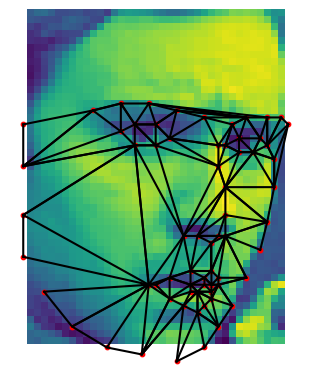

In [9]:
triangular_detection_of_facial_parts(array_example)

باید ببینیم هر دلونی چه نقاطی را به ما برمیگرداند

اینطور که پیداست اندیس هایی مشخصا برای چشم ها ولب ها موجود است و ما همین را میخواهیم

یک شی گلوبال ساده تعریف کردیم که بعدا آن را کامنت خواهم کرد زیرا فقط برای تست است

این شی به نام گلوبال دیتکتور کیپر قرار است یک شی از کلاس دلونی را نگه دارد و ما از تحلیل آن بهره خواهیم برد

In [11]:
temp = global_detector_keeper[0]

گلوبال دیتکتور یک لیست است و اولین و تنها محتوی آن یک شی از کلاس دلونی است

 که در سلول قبلی در لا به لای خصوص تابع آن را جای گزاری کردم که اپند شود به گلوبال ما

خیلی ساده اول پلات کنیم نقاطشو

In [ ]:
#from matplotlib import colors
#colors.get_named_colors_mapping()

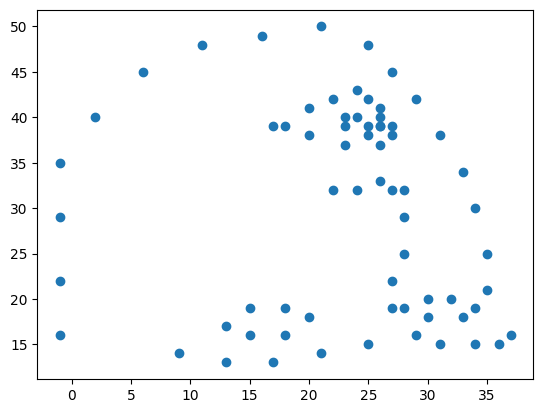

In [41]:
plt.scatter(temp.points[:,0],temp.points[:,1])
plt.show()

خب باید نسبت به خط ایکس ها قرینه بشه

ینی باید وای هاش  رو در منفی ضرب کنیم

In [42]:
temp.points[:,1] = - temp.points[:,1]

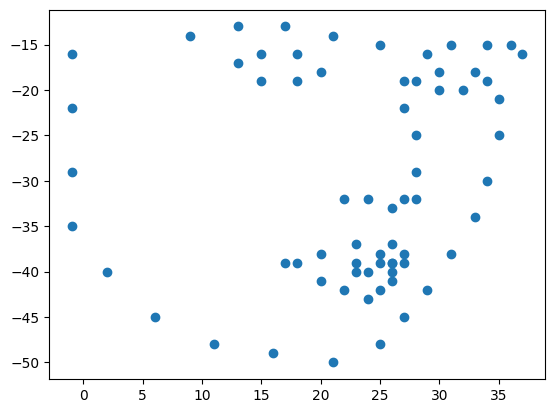

In [43]:
plt.scatter(temp.points[:,0],temp.points[:,1])
plt.show()

برسی های زیر رو مرحله به مرحله انجام دادیم تا فهمیدیم که این کلاس دلونی عزیز اندیس هارو

با ترتیب و نظم مشخصی ارائه میده!

ببیننید

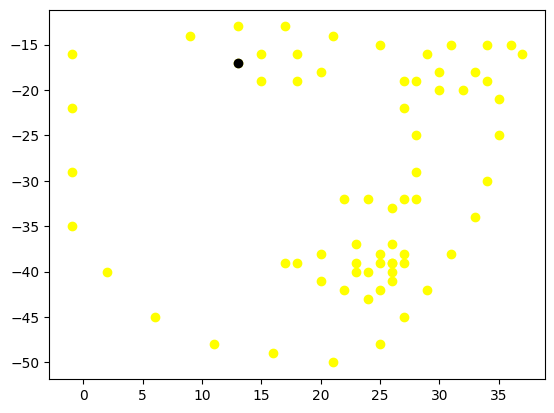

In [22]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.show()

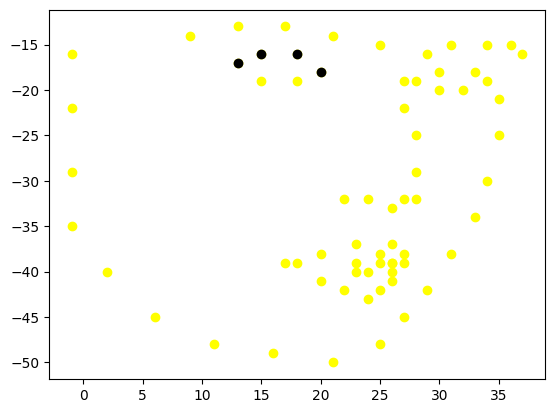

In [17]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.scatter(temp.points[37,0],temp.points[37,1], c = 'black')
plt.scatter(temp.points[38,0],temp.points[38,1], c = 'black')
plt.scatter(temp.points[39,0],temp.points[39,1], c = 'black')
plt.show()

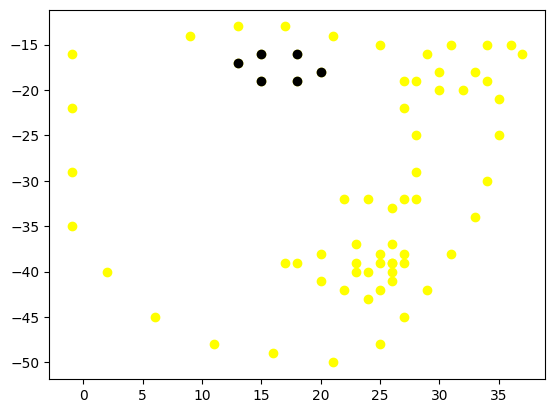

In [18]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36,0],temp.points[36,1], c = 'black')
plt.scatter(temp.points[37,0],temp.points[37,1], c = 'black')
plt.scatter(temp.points[38,0],temp.points[38,1], c = 'black')
plt.scatter(temp.points[39,0],temp.points[39,1], c = 'black')
plt.scatter(temp.points[40,0],temp.points[40,1], c = 'black')
plt.scatter(temp.points[41,0],temp.points[41,1], c = 'black')
plt.show()

با ادامه برسی ها فهمیدیم که :

اندیس های چشم راست همیشه
۴۲ 
تا
۴۸

اندیس های چشم چپ از ۳۶ 
تا ۴۲

و لب ها از ۴۸ تا 60

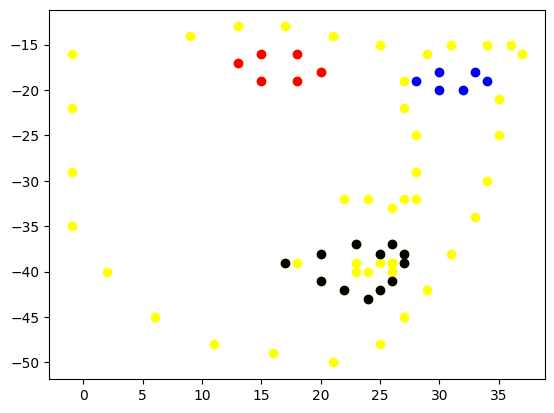

In [19]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36:42,0],temp.points[36:42,1], c = 'red')
plt.scatter(temp.points[42:48,0],temp.points[42:48,1], c = 'blue')
plt.scatter(temp.points[48:60,0],temp.points[48:60,1], c = 'black')
plt.show()

یا اگر تا آخر رنگ کنیم

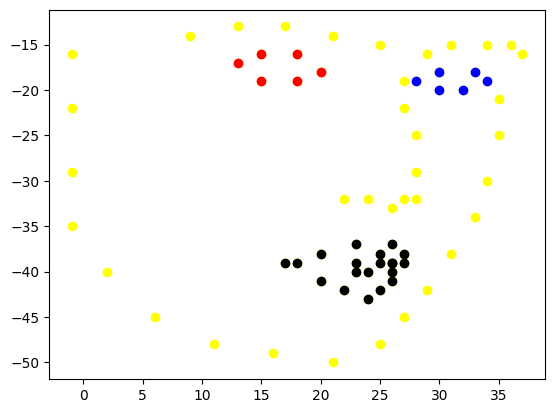

In [75]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.scatter(temp.points[36:42,0],temp.points[36:42,1], c = 'red')
plt.scatter(temp.points[42:48,0],temp.points[42:48,1], c = 'blue')
plt.scatter(temp.points[48:,0],temp.points[48:,1], c = 'black')
plt.show()

تا اینجا:

مثلث های چشم چپ : اندیس های ۳۶و۳۷و۴۱ | ۳۷و۳۸و۴۰ | ۳۷و۴۱و۴۰ | ۳۸و۳۹و۴۰

مثلث های چشم راست : اندیس های  ۴۲و۴۳و۴۷    | ۴۳و۴۴و۴۶ | ۴۳و۴۷و۴۶  |  ۴۴و۴۵و۴۶

که با رنگ های مختلف در زیر میارم

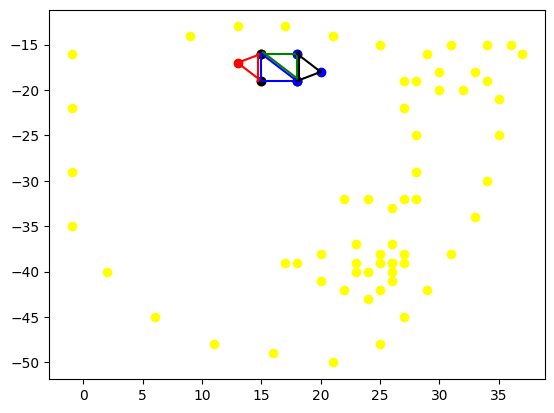

In [110]:
plt.scatter(temp.points[:,0],temp.points[:,1], c = 'yellow')
plt.plot([ temp.points[36,0], temp.points[37,0] ] ,[temp.points[36,1],temp.points[37,1]], color='red')
plt.plot([ temp.points[36,0], temp.points[41,0] ] ,[temp.points[36,1],temp.points[41,1]], color='red')
plt.plot([ temp.points[37,0]-0.3, temp.points[41,0]-0.3 ] ,[temp.points[37,1],temp.points[41,1]], color='red')

plt.plot([ temp.points[37,0], temp.points[38,0] ] ,[temp.points[37,1],temp.points[38,1]], color='green')
plt.plot([ temp.points[37,0]+0.15, temp.points[40,0]+0.15 ] ,[temp.points[37,1]+0.15,temp.points[40,1]+0.15], color='green')
plt.plot([ temp.points[38,0], temp.points[40,0] ] ,[temp.points[38,1],temp.points[40,1]], color='green')

plt.plot([ temp.points[37,0], temp.points[41,0] ] ,[temp.points[37,1],temp.points[41,1]], color='blue')
plt.plot([ temp.points[37,0], temp.points[40,0] ] ,[temp.points[37,1],temp.points[40,1]], color='blue')
plt.plot([ temp.points[41,0], temp.points[40,0] ] ,[temp.points[41,1],temp.points[40,1]], color='blue')

plt.plot([ temp.points[38,0], temp.points[39,0] ] ,[temp.points[38,1],temp.points[39,1]], color='black')
plt.plot([ temp.points[38,0]+0.15, temp.points[40,0]+0.15 ] ,[temp.points[38,1]+0.15,temp.points[40,1]+0.15], color='black')
plt.plot([ temp.points[39,0], temp.points[40,0] ] ,[temp.points[39,1],temp.points[40,1]], color='black')
plt.show()

به طرق مشابه تمام اندیس های لازم را برمیداریم

اما پیش از آن بیایید مقادیری را که هر مثلث ایجاد میکند ،پیدا و از طریق آن مساحت ومحیط هر مثلث را محاسبه کنیم

این کار خود میتواند بعدا به عنوان یکی از ویژگی های تحویل داده شده به مدل استفاده شود

In [44]:
# اسم شی دلونی موقت و آزمایشی خودمون رو به اسم زیر تغییر میدیم برای درک بهتر در ادامه

tri = temp

In [ ]:
#  در نهایت مشابه این یافته های برای تک تک تصاویر و چهره ها و دلونی ها محاسبه خواهیم نمود 

In [37]:
points = tri.points

In [8]:
from SimpleS.Points.Triangle import calculate_triangle_area, edge_lengths, circumcircle_radius, interior_angles

#### *points_eye_left = points[36:42,:]*
#### *points_eye_right = points[42:48,:]*
#### *points_lips = points[48:68,:]*
#### *valid_points = points[36:68,:]*

چند تا تابع برای استفاده از ویژگی های دریافتی از دلونی از کتابخونه ی محترم سیمپل اسپیس و چند تا تابع هم

خودمون تعریف میکنیم

In [9]:
def aspect_ratio(pts):
    lengths = edge_lengths(pts)
    return max(lengths) / min(lengths)

def perimeter(pts):
    return sum(edge_lengths(pts))

def centroid(pts):
    return np.mean(pts, axis=0)

In [41]:
# Compute features for each triangle
areas = []
edge_lengths_list = []
circumcircle_radii = []
aspect_ratios = []
perimeters = []
centroids = []
interior_angles_list = []

for simplex in tri.simplices:
    pts = points[simplex]
    a,b,c = pts
    areas.append(calculate_triangle_area(a,b,c))
    edge_lengths_list.append(edge_lengths(pts))
    circumcircle_radii.append(circumcircle_radius(pts))
    aspect_ratios.append(aspect_ratio(pts))
    perimeters.append(perimeter(pts))
    centroids.append(centroid(pts))
    interior_angles_list.append(interior_angles(pts))

In [43]:
areas[0], edge_lengths_list[0], circumcircle_radii[0], aspect_ratios[0] , perimeters[0], centroids[0]

(0.999999999999733,
 (4.123105625617661, 10.198039027185569, 14.317821063276353),
 150.50747489742824,
 3.4725816807401038,
 28.638965716079582,
 array([ 7.        , 14.33333333]))

این ها تمام اندیس ها هستند. ما بعدا فقط قسمت چشم ها و لب ها را به عنوان  نقاط به کلاس دلونی میدهیم

In [44]:
areas = np.array(areas)
edge_lengths_array = np.array(edge_lengths_list)
circumcircle_radii = np.array(circumcircle_radii)
aspect_ratios = np.array(aspect_ratios)
perimeters = np.array(perimeters)
centroids = np.array(centroids)
interior_angles_array = np.array(interior_angles_list)

features = np.column_stack((areas, edge_lengths_array, circumcircle_radii, aspect_ratios, perimeters, centroids, interior_angles_array))

print("Areas:", areas[:5],"و...")
print("Edge Lengths:", edge_lengths_array[:5],"و...")
print("Circumcircle Radii:", circumcircle_radii[:5],"و...")
print("Aspect Ratios:", aspect_ratios[:5],"و...")
print("Perimeters:", perimeters[:5],"و...")
print("Centroids:", centroids[:5],"و...")
print("Interior Angles:", interior_angles_array[:5],"و...")
print("Feature Matrix:\n", features)

Areas: [ 1.   8.  12.5  0.5 17.5] و...
Edge Lengths: [[ 4.12310563 10.19803903 14.31782106]
 [ 4.12310563  4.          5.        ]
 [ 3.16227766  9.21954446 11.18033989]
 [ 5.09901951  9.21954446 14.31782106]
 [ 7.81024968  7.          5.09901951]] و...
Circumcircle Radii: [150.5074749    2.57694102   6.51920241 336.54494499   3.98246155] و...
Aspect Ratios: [3.47258168 1.25       3.53553391 2.80795573 1.53171598] و...
Perimeters: [28.63896572 13.12310563 23.562162   28.63638503 19.90926919] و...
Centroids: [[ 7.         14.33333333]
 [11.66666667 14.66666667]
 [25.66666667 26.33333333]
 [35.33333333 23.66666667]
 [32.33333333 26.66666667]] و...
Interior Angles: [[0.01369777 0.03388533 3.09400955]
 [0.92729522 0.88847977 1.32581766]
 [0.24497866 0.78539816 2.11121583]
 [0.00757561 0.01369777 3.12031927]
 [1.37340077 1.07345361 0.69473828]] و...
Feature Matrix:
 [[ 1.          4.12310563 10.19803903 ...  0.01369777  0.03388533
   3.09400955]
 [ 8.          4.12310563  4.         ...  0.

ما تونستیم که یک سری ویژگی ها از دلونی های تشکیل شده خارج کنیم

حالا میاییم قسمت های مختلف مثل چشم ها و لب ها رو جداگانه به دلونی میدیم و خروجی ها رو درستون های ججداگانه ذخیره میکنیم

به علاوه این کار رو برای تمام دیتامون انجام میدیم

In [ ]:
vertex_degree = np.zeros(len(points))
for simplex in tri.simplices:
    for vertex in simplex:
        vertex_degree[vertex] += 1

print("Vertex Degrees:", vertex_degree)

In [46]:
neighbor_count = np.array([len(neigh) for neigh in tri.neighbors])
print("Neighbor Count for Each Triangle:", neighbor_count)

Neighbor Count for Each Triangle: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


حالا تابع رو به شکل دیگه ای مینویسیم که برای ما دلونیِ قسمت های مشخص شده ی صورت رو برگردونه ینی اندیس های ۳۶ تا ۶۸

In [38]:


def detection(image_array):
    
    collection = []
    detections = detector(image_array, 1)
    for k, d in enumerate(detections):
        shape = predictor(image_array, d)
        points = np.array([[p.x, p.y] for p in shape.parts()])
        
        valid_part_indices = np.arange(36, 68)
        
        valid_part = points[valid_part_indices]
        
        delony_valid = Delaunay(valid_part)
        collection.append( delony_valid )
    
    return delony_valid


یه سری لیست خالی برای گذاشتن مقادیری که میخوایم

یکی خود شی دلونی که البته داخل یدونه لیست بهمون عرضه میشه

یکی برای آی دی هر نفر یکی هم برای ستون تارگت ک همون اموشنه

In [58]:
collector_id = []
collector_target = []
collector_delony = []

no_detection_delony = []
police_delony = []

In [59]:
for idx, row in df.iterrows():
    target = row['emotion']
    array = load_array_from_path(f"{path_to_cropped_faces}/face_{idx}.jpg_{idx}.npy")
    temp_delo = detection(array)
    if len(temp_delo) == 0:
        no_detection_delony.append(idx)
        police_delony.append(row['name'])
    else:
        collector_delony.append(temp_delo)
        collector_id.append(idx)
        collector_target.append(target)

دیگه بعد از این با دیتا فریم قبلیمون کاری نداریم و حالا دیگه نو قراره بیاد به بازار

In [60]:
len(no_detection_delony) , len(police_delony)

(1705, 1705)

In [61]:
len(collector_id) , len(collector_target), len(collector_delony)

(6916, 6916, 6916)

باز هم مواردی وجود داشت که نشد پیدا بکنه دلونی رو

که حذف شدن

In [63]:
no_detection_delony[-1],police_delony[-1],police_delony[0]

(35866, 'face_35866.jpg', 'face_7.jpg')

In [62]:
collector_delony[-1],collector_target[-1],collector_id[-1]

([<scipy.spatial._qhull.Delaunay at 0x7f9a8b552bd0>], 2, 35886)

```python

features = {
    "Area": [],
    "Edge Length 1": [],
    "Edge Length 2": [],
    "Edge Length 3": [],
    "Circumcircle Radius": [],
    "Aspect Ratio": [],
    "Perimeter": [],
    "Centroid X": [],
    "Centroid Y": [],
    "Interior Angle 1": [],
    "Interior Angle 2": [],
    "Interior Angle 3": []
}
```

In [65]:
collector_data = []
exceptions_data = []

اینجا هم مواردی که باهم بالاتر دیدیم از تک تک دلونی ها میگیریم

برام سواله آیا هست موردی که دو تا دلونی داشته باشه؟

میبینم که نه!

In [66]:
for any_delo in collector_delony:
    if len(any_delo) == 2:
        exceptions_data.append(collector_delony.index(any_delo))
        continue
    any_delo = any_delo[0]
    features = {
        "Area": [],
        "Edge Length 1": [],
        "Edge Length 2": [],
        "Edge Length 3": [],
        "Circumcircle Radius": [],
        "Aspect Ratio": [],
        "Perimeter": [],
        "Centroid X": [],
        "Centroid Y": [],
        "Interior Angle 1": [],
        "Interior Angle 2": [],
        "Interior Angle 3": []
    }
    points = any_delo.points
    for simplex in any_delo.simplices:
        pts = points[simplex]
        features["Area"].append(calculate_triangle_area(pts[0], pts[1], pts[2]))
        e1, e2, e3 = edge_lengths(pts)
        features["Edge Length 1"].append(e1)
        features["Edge Length 2"].append(e2)
        features["Edge Length 3"].append(e3)
        features["Circumcircle Radius"].append(circumcircle_radius(pts))
        features["Aspect Ratio"].append(aspect_ratio(pts))
        features["Perimeter"].append(perimeter(pts))
        centroid_x, centroid_y = centroid(pts)
        features["Centroid X"].append(centroid_x)
        features["Centroid Y"].append(centroid_y)
        angle1, angle2, angle3 = interior_angles(pts)
        features["Interior Angle 1"].append(angle1)
        features["Interior Angle 2"].append(angle2)
        features["Interior Angle 3"].append(angle3)
    collector_data.append(features)

In [ ]:
#exceptions_data # No one

دیتا فریم رو میسازیم با اضافه کردن تارگت و آی دی

In [ ]:
df_features = pd.DataFrame(collector_data)

In [73]:
df_features.head()

,Area,Edge Length 1,Edge Length 2,Edge Length 3,Circumcircle Radius,Aspect Ratio,Perimeter,Centroid X,Centroid Y,Interior Angle 1,Interior Angle 2,Interior Angle 3
0,"[2.9999999999999996, 90.00000000000001, 4.9999...","[3.0, 10.0, 10.0, 10.44030650891055, 18.681541...","[2.8284271247461903, 18.681541692269406, 2.236...","[2.23606797749979, 18.681541692269406, 8.06225...","[1.58113883008419, 9.694444444444446, 9.013878...","[1.3416407864998738, 1.8681541692269406, 4.472...","[8.06449510224598, 47.36308338453881, 20.29832...","[18.666666666666668, 23.0, 22.0, 22.0, 31.0, 2...","[17.666666666666668, 25.0, 18.666666666666668,...","[1.2490457723982542, 0.541893700676841, 2.5535...","[1.1071487177940906, 1.299849476456476, 0.1243...","[0.7853981633974483, 1.299849476456476, 0.4636..."
1,"[5.000000000000003, 13.999999999999947, 24.000...","[4.123105625617661, 19.6468827043885, 19.64688...","[3.605551275463989, 2.8284271247461903, 2.8284...","[2.8284271247461903, 22.135943621178654, 18.38...","[2.1023796041628637, 21.965882636488796, 10.64...","[1.457737973711325, 7.826237921249263, 6.94622...","[10.55708402582784, 44.61125345031334, 40.8600...","[32.333333333333336, 31.0, 28.0, 22.3333333333...","[19.0, 26.666666666666668, 33.0, 18.6666666666...","[1.373400766945016, 0.46364760900080615, 1.965...","[1.0303768265243125, 0.06442683942555323, 0.13...","[0.7378150601204647, 2.613518205163434, 1.0427..."
2,"[4.500000000000003, 17.999999999999957, 15.999...","[3.0, 19.1049731745428, 18.439088914585774, 2....","[3.605551275463989, 2.23606797749979, 19.92485...","[3.1622776601683795, 20.396078054371138, 2.236...","[1.9002923751652299, 12.101678283773312, 12.83...","[1.2018504251546631, 9.121403400793103, 8.9106...","[9.76782893563237, 41.73711920641372, 40.60001...","[14.0, 32.0, 11.666666666666666, 13.0, 19.3333...","[20.666666666666668, 26.0, 27.666666666666668,...","[0.9097531579442097, 0.9097531579442097, 0.801...","[1.2490457723982544, 0.0925186211196461, 2.253...","[0.9827937232473287, 2.139320874525937, 0.0872..."
3,"[3.000000000000001, 27.000000000000036, 14.999...","[2.0, 18.24828759089466, 15.0, 5.0990195135927...","[3.605551275463989, 3.0, 12.165525060596439, 1...","[3.0, 18.0, 3.605551275463989, 17.720045146669...","[1.8027756377319946, 9.12414379544733, 10.9658...","[1.8027756377319946, 6.082762530298219, 4.1602...","[8.60555127546399, 39.24828759089466, 30.77107...","[13.0, 14.0, 18.0, 16.666666666666668, 20.6666...","[17.333333333333332, 24.0, 16.666666666666668,...","[0.5880026035475675, 1.5707963267948966, 2.388...","[1.5707963267948966, 0.16514867741462608, 0.58...","[0.9827937232473292, 1.4056476493802705, 0.165..."
4,"[22.500000000000032, 1.4999999999999998, 1.499...","[15.132745950421556, 1.4142135623730951, 3.605...","[15.811388300841896, 3.0, 1.0, 3.6055512754639...","[3.0, 2.23606797749979, 4.242640687119285, 3.1...","[7.975657409336932, 1.58113883008419, 2.549509...","[5.270462766947299, 2.1213203435596424, 4.2426...","[33.94413425126345, 6.650281539872885, 8.84819...","[10.666666666666666, 9.666666666666666, 30.666...","[24.0, 18.666666666666668, 33.0, 33.0, 17.3333...","[1.2490457723982547, 0.46364760900080615, 0.78...","[1.7033478590915703, 1.8925468811915385, 0.197...","[0.1891990220999682, 0.7853981633974485, 2.158..."


In [74]:
collector_id_ser = pd.Series(collector_id)

In [ ]:
df_features.insert(loc = 0, column= 'ID', value = collector_id_ser)

In [76]:
collector_target_ser = pd.Series(collector_target)

In [77]:
df_features["Target"] = collector_target_ser

In [81]:
df_features.tail(2)

,Area,Edge Length 1,Edge Length 2,Edge Length 3,Circumcircle Radius,Aspect Ratio,Perimeter,Centroid X,Centroid Y,Interior Angle 1,Interior Angle 2,Interior Angle 3,ID,Target
6914,"[16.00000000000006, 4.000000000000001, 27.9999...","[18.110770276274835, 3.1622776601683795, 17.72...","[20.396078054371138, 2.8284271247461903, 3.162...","[2.8284271247461903, 3.1622776601683795, 18.11...","[16.32482771731451, 1.767766952966369, 9.06115...","[7.211102550927977, 1.118033988749895, 5.72712...","[41.335275455392164, 9.15298244508295, 38.9930...","[10.0, 9.666666666666666, 12.333333333333334, ...","[25.333333333333332, 18.333333333333332, 31.66...","[0.5880026035475693, 1.1071487177940904, 1.359...","[2.466851711366239, 0.9272952180016123, 0.1753...","[0.08673833867598502, 1.1071487177940904, 1.60...",35882,6
6915,"[4.000000000000001, 19.0, 3.000000000000058, 1...","[3.1622776601683795, 19.1049731745428, 1.0, 20...","[2.8284271247461903, 19.0, 21.840329667841555,...","[3.1622776601683795, 2.0, 22.80350850198276, 2...","[1.767766952966369, 9.5524865872714, 41.503011...","[1.118033988749895, 9.5524865872714, 22.803508...","[9.15298244508295, 40.1049731745428, 45.643838...","[11.666666666666666, 27.333333333333332, 31.0,...","[18.333333333333332, 31.666666666666668, 32.33...","[1.1071487177940904, 1.570796326794896, 0.0120...","[0.9272952180016123, 1.4659193880646635, 0.266...","[1.1071487177940904, 0.10487693873023374, 2.86...",35886,2


In [82]:
print(df_features)

                                                   Area  \
0     [2.9999999999999996, 90.00000000000001, 4.9999...   
1     [5.000000000000003, 13.999999999999947, 24.000...   
2     [4.500000000000003, 17.999999999999957, 15.999...   
3     [3.000000000000001, 27.000000000000036, 14.999...   
4     [22.500000000000032, 1.4999999999999998, 1.499...   
...                                                 ...   
6911  [106.99999999999996, 16.999999999999964, 3.000...   
6912  [3.000000000000001, 87.99999999999996, 10.9999...   
6913  [14.499999999999984, 12.500000000000005, 2.0, ...   
6914  [16.00000000000006, 4.000000000000001, 27.9999...   
6915  [4.000000000000001, 19.0, 3.000000000000058, 1...   

                                          Edge Length 1  \
0     [3.0, 10.0, 10.0, 10.44030650891055, 18.681541...   
1     [4.123105625617661, 19.6468827043885, 19.64688...   
2     [3.0, 19.1049731745428, 18.439088914585774, 2....   
3     [2.0, 18.24828759089466, 15.0, 5.0990195135927...

import ace_tools as tools; tools.display_dataframe_to_user(name="Delaunay Features", dataframe=df_features)


In [84]:
df_features.to_excel('data/output/df_features.xlsx', index=False)

ما همه چیز را آماده کردیم برای پیش بینی ینی مرحله ی آخر